In [9]:
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)

################################################
%matplotlib inline
################################################


In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Data-Science-for-Marketing-Analytics-Second-Edition/master/Chapter04/Datasets/Clothing_Customers.csv')


In [11]:
df.head()


,income,age,days_since_purchase,annual_spend
0,37453,48,504,4441
1,50775,50,566,4239
2,71047,41,326,5834
3,52239,52,259,5456
4,112343,27,279,1749


In [12]:
class Clustering:
    """Instantiates an object that takes a dataframe as an argument and gives the user the chance to scale any columns that they want and then reduce the dimensioanlity of these columns for clustering, or just perform both of these functions and create a clustering chart for it too by using the 'getClusterChart' function"""
    def __init__(self, df, cols_to_scale, cols_to_reduce):
        """Initiating the properties of the object that will be instantiated using this class
            we assign the original dataframe to self.df, the scaled version of this original df to
            self.df_scaled, and the dataframe with the reduced dimensionality to the self.df_scaled_reduced"""
        self.df = df
        self.df_scaled = pd.DataFrame()
        self.df_scaled_reduced = self.df_scaled.copy()
        self.cols_to_scale = cols_to_scale
        self.cols_to_reduce = cols_to_reduce

    def scaleAndReduce(self):
        """Assign the df_scaled and df_scaled_reduced with the suitable values."""
        self.getScaledData()
        self.getReducedDimensions(n_components=2)

    def getScaledData(self):
        """Set df_scaled to the scaled datatframe"""
        scaler = StandardScaler()
        self.df_scaled[self.cols_to_scale] = scaler.fit_transform(
            self.df[self.cols_to_scale])

    def getReducedDimensions(self, n_components):
        """Set df_scaled_reduced to the suitable values, where there will be two columns, namely pc1 and pc2"""
        pca = PCA(n_components=n_components)
        pca_res = pca.fit_transform(self.df_scaled[self.cols_to_reduce])
        for i in range(0, n_components):
            self.df_scaled_reduced[f'pc{i+1}'] = pca_res[:, i]

    def getClusterChart(self):
        self.getScaledData()
        self.getReducedDimensions(n_components=2)
        cluster_cols = ['pc1', 'pc2']
        markers = ['x', '*', '.', '|', '_', '1', '2']
        plt.figure(figsize=[20, 12])
        for n in range(2, 8):
            model = KMeans(n_clusters=n, random_state=42)
            self.df_scaled_reduced['Cluster'] = model.fit_predict(
                self.df_scaled_reduced[cluster_cols])
            plt.subplot(2, 3, n-1)
            for clust in range(n):
                temp = self.df_scaled_reduced[self.df_scaled_reduced.Cluster == clust]
                plt.scatter(temp.pc1, temp.pc2,
                            marker=markers[clust], label="Cluster "+str(clust), color='gray')
                plt.title("N clusters: "+str(n))
                plt.xlabel('pc1')
        plt.ylabel('pc2')
        plt.legend()
        plt.show()
        
    def getElbowChart(self):
        self.scaleAndReduce()
        cluster_cols =['pc1', 'pc2']
        X = self.df_scaled_reduced[cluster_cols]
        inertia_scores = []
        for K in range(2, 11):
            inertia = KMeans(n_clusters=K, random_state=42).fit(X).inertia_
            inertia_scores.append(inertia)
        plt.figure(figsize=[7, 5])
        plt.plot(range(2, 11), inertia_scores, color='gray')
        plt.title("SSE/Inertia vs. number of clusters")
        plt.xlabel("Number of clusters: K")
        plt.ylabel('SSE/Inertia')
        plt.show()

In [13]:
clustering = Clustering(df, cols_to_scale=['income','age','days_since_purchase','annual_spend'], cols_to_reduce=['income','age','days_since_purchase','annual_spend'])

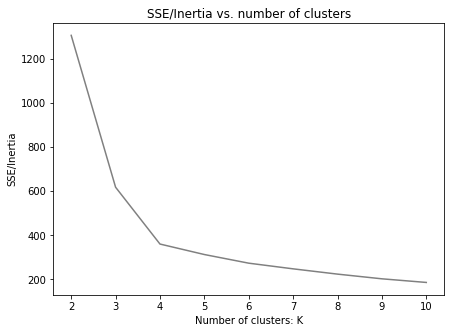

In [14]:
clustering.getElbowChart()